### load libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import  classification_report

### load Data

In [3]:
df = pd.read_csv(r'/content/spotify_history.csv')
df

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149855,4Fz1WWr5o0OrlIcZxcyZtK,2024-12-15 23:06:19,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True
149856,0qHMhBZqYb99yhX9BHcIkV,2024-12-15 23:06:21,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True
149857,0HHdujGjOZChTrl8lJWEIq,2024-12-15 23:06:22,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True
149858,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True


### Data Exploration and Cleaning

In [5]:
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [6]:
df.tail()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
149855,4Fz1WWr5o0OrlIcZxcyZtK,2024-12-15 23:06:19,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True
149856,0qHMhBZqYb99yhX9BHcIkV,2024-12-15 23:06:21,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True
149857,0HHdujGjOZChTrl8lJWEIq,2024-12-15 23:06:22,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True
149858,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True
149859,6iGU74CwXuT4XVepjc9Emf,2024-12-15 23:06:25,android,1893,God Only Knows - Mono,The Beach Boys,Pet Sounds,fwdbtn,fwdbtn,True,True


In [7]:
df.sample(2)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
43670,5VWC7v2dC2K0SIIjT9WTLN,2018-08-03 03:20:42,android,4029,Welcome to the Machine,Pink Floyd,Wish You Were Here,clickrow,fwdbtn,True,False
70329,3FuJEZ6AeRaIDM5ND9sMty,2020-04-13 22:56:06,cast to device,155330,"I'm Left, You're Right, She's Gone",Elvis Presley,For LP Fans Only,trackdone,trackdone,False,False


In [8]:
df.describe()

,ms_played
count,1.498600e+05
mean,1.283166e+05
std,1.178401e+05
min,0.000000e+00
25%,2.795000e+03
50%,1.388400e+05
75%,2.185070e+05
max,1.561125e+06


In [10]:
df.shape

(149860, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [13]:
df.isnull()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149855,False,False,False,False,False,False,False,False,False,False,False
149856,False,False,False,False,False,False,False,False,False,False,False
149857,False,False,False,False,False,False,False,False,False,False,False
149858,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

,0
spotify_track_uri,0
ts,0
platform,0
ms_played,0
track_name,0
artist_name,0
album_name,0
reason_start,143
reason_end,117
shuffle,0


In [15]:
d = df.isnull().sum()
d[d > 0]

,0
reason_start,143
reason_end,117


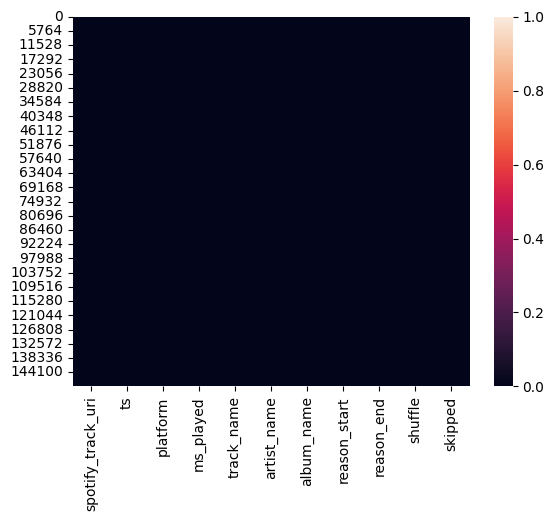

In [19]:
sns.heatmap(df.isnull())
plt.show()

In [20]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
149855,False
149856,False
149857,False
149858,False


In [21]:
df.duplicated().sum()

np.int64(1185)

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.duplicated().sum()

np.int64(0)

In [28]:
df = df.dropna()
df

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149855,4Fz1WWr5o0OrlIcZxcyZtK,2024-12-15 23:06:19,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True
149856,0qHMhBZqYb99yhX9BHcIkV,2024-12-15 23:06:21,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True
149857,0HHdujGjOZChTrl8lJWEIq,2024-12-15 23:06:22,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True
149858,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True


In [29]:
df.isnull().sum()

,0
spotify_track_uri,0
ts,0
platform,0
ms_played,0
track_name,0
artist_name,0
album_name,0
reason_start,0
reason_end,0
shuffle,0


In [30]:
d = df.isnull().sum()
d[d > 0]

,0


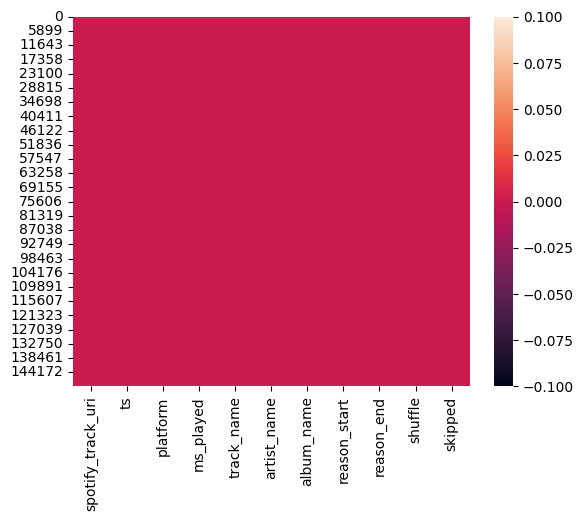

In [31]:
sns.heatmap(df.isnull())
plt.show()

### data analysis

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33853 (\N{CJK UNIFIED IDEOGRAPH-843D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39131 (\N{CJK UNIFIED IDEOGRAPH-98DB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36554 (\N{CJK UNIFIED IDEOGRAPH-8ECA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12476 (\N{KATAKANA LETTER ZE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

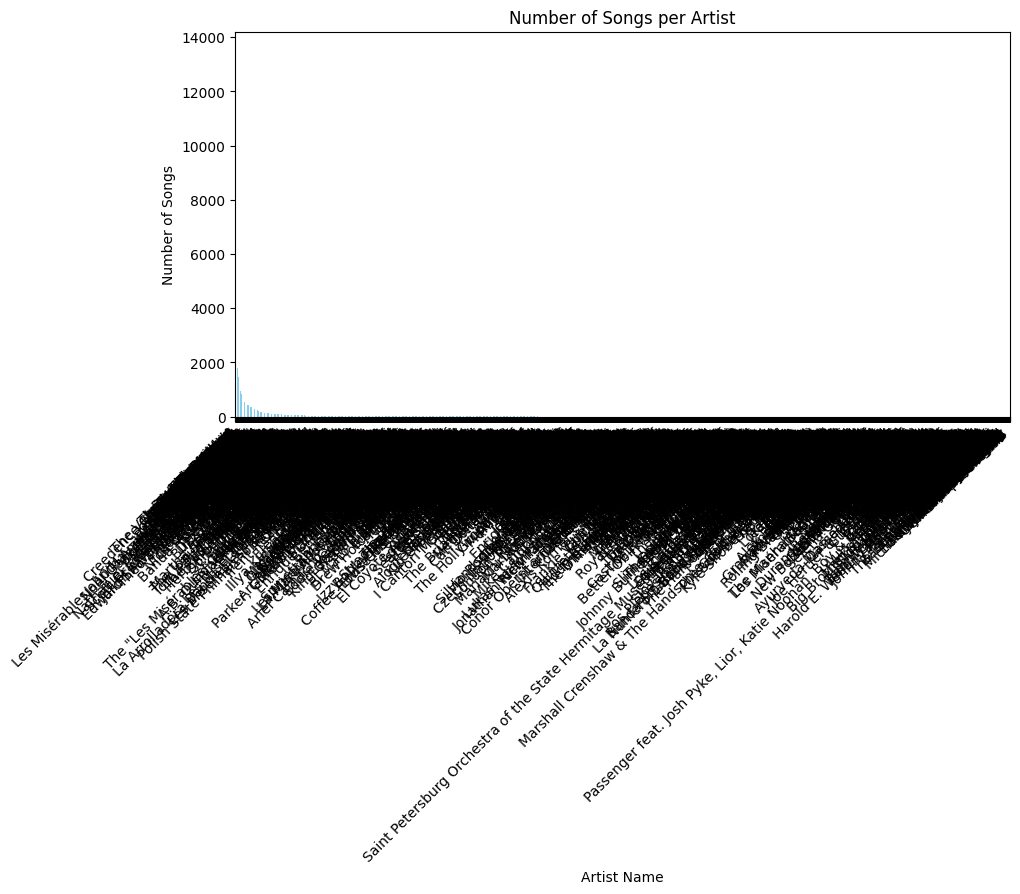

In [34]:
plt.figure(figsize=(10, 5))
df['artist_name'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Songs per Artist')
plt.xlabel('Artist Name')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', labelsize=10)
plt.gca().set_xticklabels(
    [artist.replace('$', r'\$') for artist in df['artist_name'].value_counts().index]
)

plt.show()

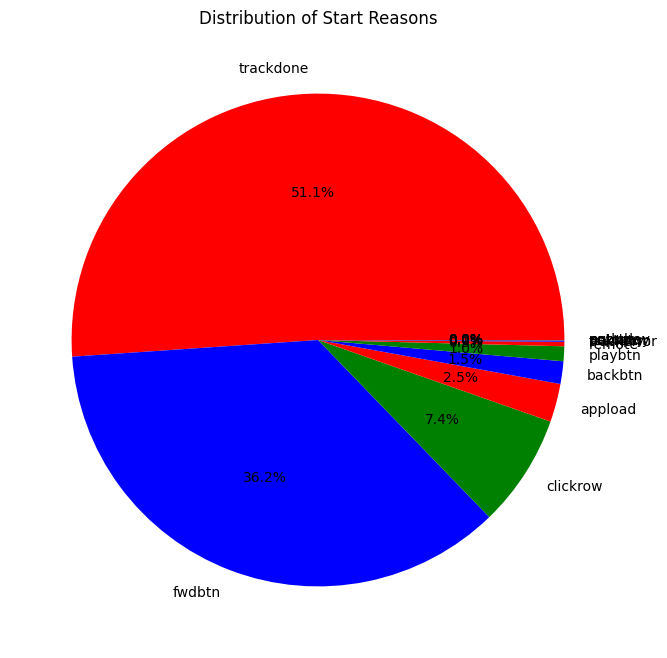

In [35]:
plt.figure(figsize=(8, 8))
df['reason_start'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'blue', 'green'])
plt.title('Distribution of Start Reasons')
plt.ylabel('')
plt.show()

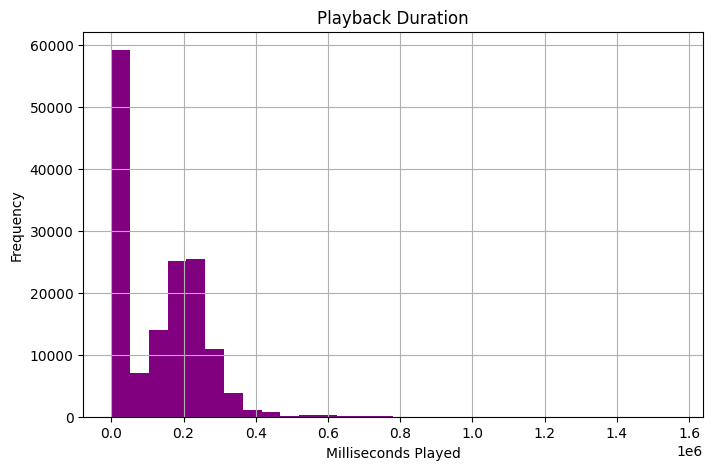

In [36]:
plt.figure(figsize=(8, 5))
df['ms_played'].hist(bins=30, color='purple')
plt.title('Playback Duration')
plt.xlabel('Milliseconds Played')
plt.ylabel('Frequency')
plt.show()

<ipython-input-37-c0a54c4e5124>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='skipped', palette='cool')


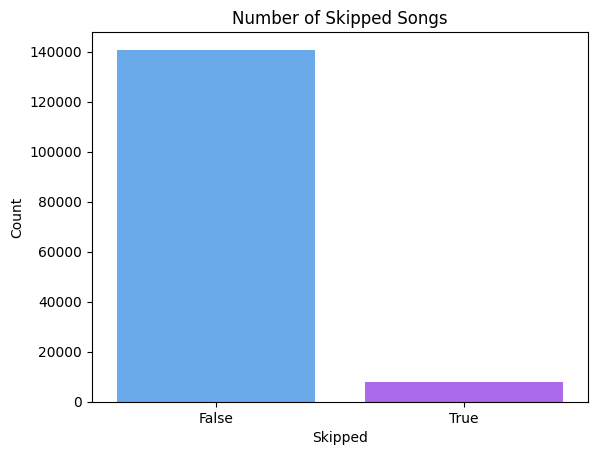

In [37]:
sns.countplot(data=df, x='skipped', palette='cool')
plt.title('Number of Skipped Songs')
plt.xlabel('Skipped')
plt.ylabel('Count')
plt.show()

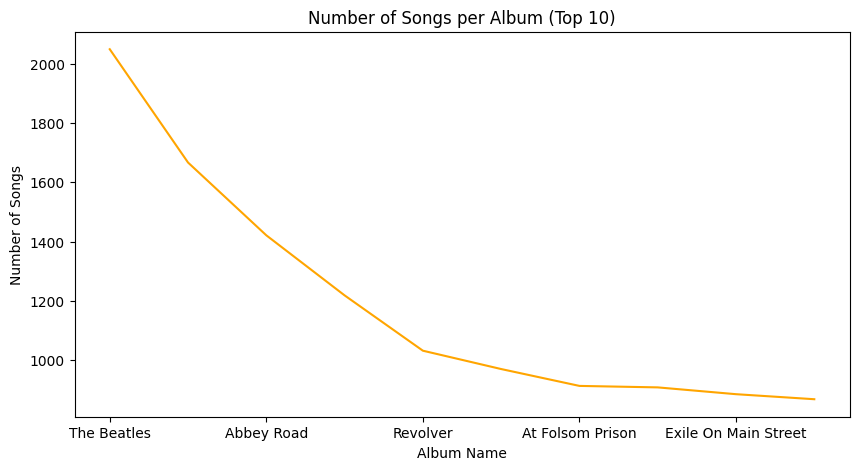

In [38]:
plt.figure(figsize=(10, 5))
df['album_name'].value_counts().head(10).plot(kind='line', color='orange')
plt.title('Number of Songs per Album (Top 10)')
plt.xlabel('Album Name')
plt.ylabel('Number of Songs')
plt.show()

<ipython-input-39-5f8e36159027>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='platform', palette='Set2')


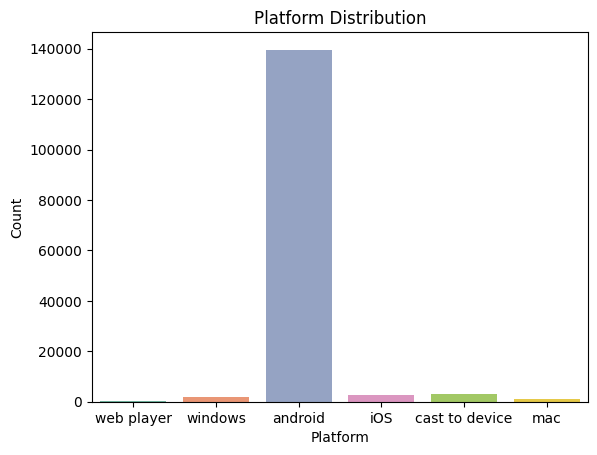

In [39]:
sns.countplot(data=df, x='platform', palette='Set2')
plt.title('Platform Distribution')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()

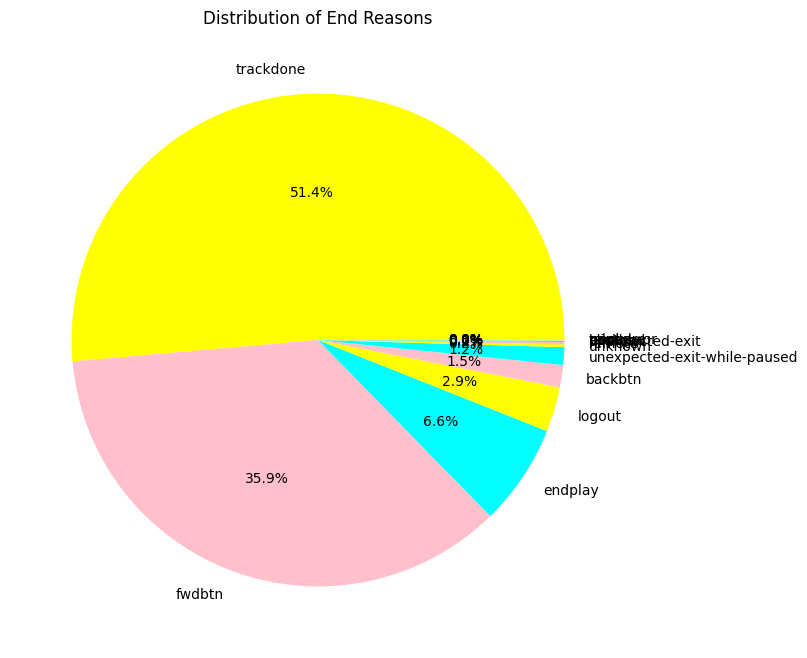

In [40]:
plt.figure(figsize=(8, 8))
df['reason_end'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['yellow', 'pink', 'cyan'])
plt.title('Distribution of End Reasons')
plt.ylabel('')
plt.show()

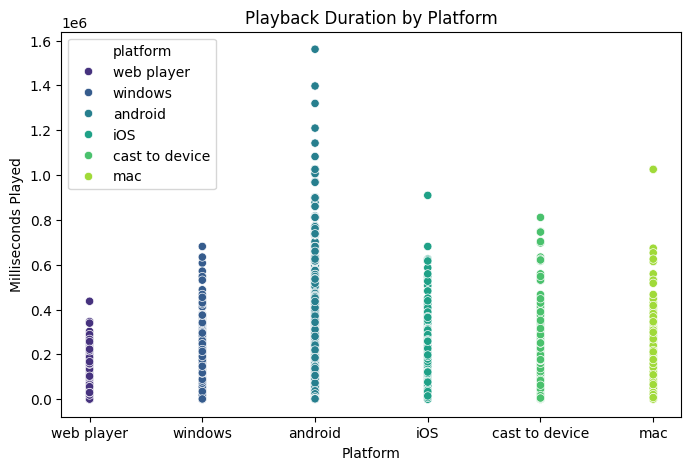

In [41]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='platform', y='ms_played', hue='platform', palette='viridis')
plt.title('Playback Duration by Platform')
plt.xlabel('Platform')
plt.ylabel('Milliseconds Played')
plt.show()

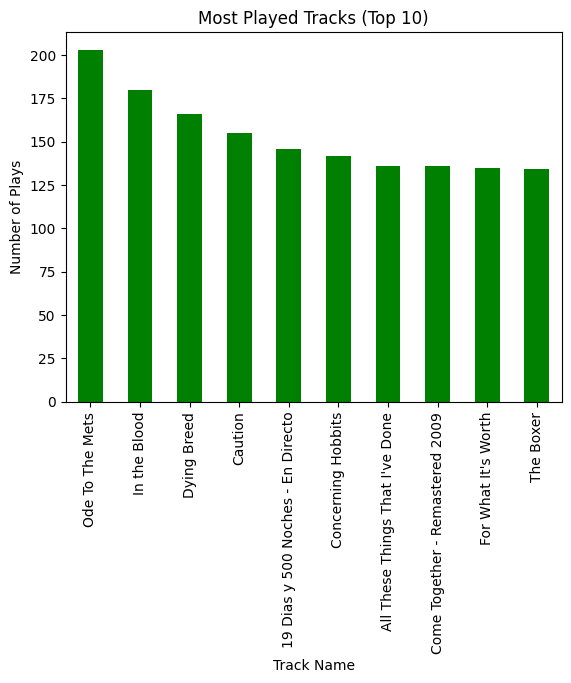

In [42]:
df['track_name'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Most Played Tracks (Top 10)')
plt.xlabel('Track Name')
plt.ylabel('Number of Plays')
plt.show()

### Features Cleaning

In [45]:
columns_to_drop = ['spotify_track_uri', 'reason_start', 'reason_end']
df = df.drop(columns=columns_to_drop)
print(df)

                         ts    platform  ms_played  \
0       2013-07-08 02:44:34  web player       3185   
1       2013-07-08 02:45:37  web player      61865   
2       2013-07-08 02:50:24  web player     285386   
3       2013-07-08 02:52:40  web player     134022   
4       2013-07-08 03:17:52  web player          0   
...                     ...         ...        ...   
149855  2024-12-15 23:06:19     android       1247   
149856  2024-12-15 23:06:21     android       1515   
149857  2024-12-15 23:06:22     android       1283   
149858  2024-12-15 23:06:23     android       1306   
149859  2024-12-15 23:06:25     android       1893   

                                               track_name        artist_name  \
0                                     Say It, Just Say It       The Mowgli's   
1           Drinking from the Bottle (feat. Tinie Tempah)      Calvin Harris   
2                                             Born To Die       Lana Del Rey   
3                              

In [47]:
df.shape

(148463, 8)

### Data Transformation

In [50]:
columns_to_encode = ['ts', 'platform', 'ms_played',
                     'track_name', 'artist_name', 'album_name',
                     'shuffle', 'skipped']

label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

print(df)

            ts  platform  ms_played  track_name  artist_name  album_name  \
0            0         4       3144        9894         3634        7459   
1            1         4      17925        3063          583          65   
2            2         4      40101        1526         2066        1001   
3            3         4      25264        8390         2066        1001   
4            4         4          0        4536         1107        7473   
...        ...       ...        ...         ...          ...         ...   
149855  140211         0       1209        8472         1769        4941   
149856  140212         0       1477        7210         3493        4105   
149857  140213         0       1245       10801         1769        7589   
149858  140214         0       1268        5222         1769        1466   
149859  140215         0       1855        4286         3492        5035   

        shuffle  skipped  
0             0        0  
1             0        0  
2     

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148463 entries, 0 to 149859
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   ts           148463 non-null  int64
 1   platform     148463 non-null  int64
 2   ms_played    148463 non-null  int64
 3   track_name   148463 non-null  int64
 4   artist_name  148463 non-null  int64
 5   album_name   148463 non-null  int64
 6   shuffle      148463 non-null  int64
 7   skipped      148463 non-null  int64
dtypes: int64(8)
memory usage: 10.2 MB


In [57]:
threshold = 30000
df['target'] = df['ms_played'].apply(lambda x: 1 if x >= threshold else 0)

print(df)

            ts  platform  ms_played  track_name  artist_name  album_name  \
0            0         4       3144        9894         3634        7459   
1            1         4      17925        3063          583          65   
2            2         4      40101        1526         2066        1001   
3            3         4      25264        8390         2066        1001   
4            4         4          0        4536         1107        7473   
...        ...       ...        ...         ...          ...         ...   
149855  140211         0       1209        8472         1769        4941   
149856  140212         0       1477        7210         3493        4105   
149857  140213         0       1245       10801         1769        7589   
149858  140214         0       1268        5222         1769        1466   
149859  140215         0       1855        4286         3492        5035   

        shuffle  skipped  target  
0             0        0       0  
1             0  

### Create Model

In [59]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44,
                      shuffle=True)

In [60]:
model1 = LogisticRegression()
model2 = GaussianNB()
model3 = MLPClassifier()
model4 = RandomForestClassifier()
model5 = DecisionTreeClassifier()
model6 = GradientBoostingClassifier()

In [64]:
accuracies = []

def all(model):
    model.fit(X_train,y_train)
    pre = model.predict(X_test)
    accuracy = accuracy_score(pre,y_test)
    print("accuracy =",accuracy)
    accuracies.append(accuracy)

In [65]:
all(model1)
all(model2)
all(model3)
all(model4)
all(model5)
all(model6)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy = 0.9135413298846858
accuracy = 0.9751050759780149


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy = 0.92534217049251
accuracy = 1.0
accuracy = 1.0
accuracy = 1.0


In [67]:
algorithms = ["LogisticRegression","GaussianNB","MLPClassifier","RandomForestClassifier"," DecisionTreeClassifier","GradientBoostingClassifier"]
new = pd.DataFrame({"algorithms":algorithms,"accuracies":accuracies})
new

,algorithms,accuracies
0,LogisticRegression,0.913541
1,GaussianNB,0.975105
2,MLPClassifier,0.925342
3,RandomForestClassifier,1.000000
4,DecisionTreeClassifier,1.000000
5,GradientBoostingClassifier,1.000000


In [76]:
modelx = GaussianNB()
modelx.fit(X_train,y_train)
prex = modelx.predict(X_test)
prex

array([1, 0, 0, ..., 0, 0, 0])

In [77]:
print(modelx.score(X_test,y_test))
print(modelx.score(X_train,y_train))

0.9751050759780149
0.9752036426666187


In [82]:
cr = classification_report(y_test, prex)
print(f'Classification Report: \n{cr}')

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     22287
           1       0.94      1.00      0.97     14829

    accuracy                           0.98     37116
   macro avg       0.97      0.98      0.97     37116
weighted avg       0.98      0.98      0.98     37116



In [78]:
cm = confusion_matrix(y_test, prex)
print(f'Confusion Matrix: \n{cm}')

Confusion Matrix: 
[[21367   920]
 [    4 14825]]


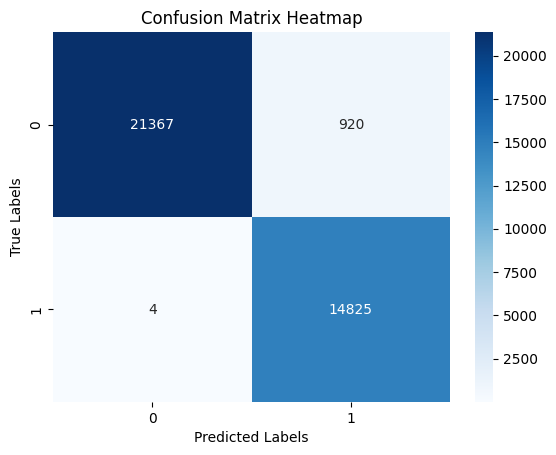

In [80]:
cm = confusion_matrix(y_test, prex)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [83]:
import pickle

with open("My model", "wb") as f:
    pickle.dump(modelx, f)